In [280]:
import pertpy as pt
import scanpy as sc
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import random
import anndata as ad

In [281]:
# read anndata
adata = pt.dt.mcfarland_2020()
#adata = sc.read("adata_subset.h5ad")
# create metadata object
pt_metadata = pt.tl.CellLineMetaData()

In [282]:
random.seed(8)
random_sample = random.sample(range(adata.n_obs), 5000)
#subset the anndata (memory issue)
adata = adata[random_sample, :]
adata.write("adata_subset.h5ad")

In [283]:
lookup = pt_metadata.lookup()

In [284]:
pt_metadata.annotate_cell_lines(adata)

AnnData object with n_obs × n_vars = 5000 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias', 'COSMICID', 'source', 'RRID', 'WTSI_Master_Cell_ID', 'sample_collection_site', 'primary_or_metastasis', 'primary_disease', 'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments', 'lineage', 'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype', 'default_growth_pattern', 'model_manipulation', 'model_manipulation_details', 'patient_i

In [285]:
# contains many NAs
lookup.bulk_rna_expression(query_id_list=adata.obs.cell_line.unique())
# pt_metadata.bulk_rna_sanger[pt_metadata.bulk_rna_sanger.index.isin(adata.obs.cell_line)]
# pt_metadata.annotate_bulk_rna_expression(adata, cell_line_source="sanger", query_id = "cell_line")

To summarize: in the RNA-Seq Data from sanger institute, you can find: 
1431 cell lines
37602 genes
Only model_name is allowed to use as `reference_id`
Default parameters to annotate bulk RNA expression: 
- query_id: cell_line_name
- cell_line_source: sanger
167 cell lines are not found in the metadata.
41 cell lines are found! 


In [286]:
pt_metadata.annotate_bulk_rna_expression(adata, cell_line_source="broad", query_id = "DepMap_ID")

To annotate bulk RNA expression data from Broad Institue,  If no `reference_id` is given, we use `DepMap_ID` as 
reference and query indentifier as default.  Please make sure that `DepMap_ID` is available in the adata.obs.  or 
use the `annotate_cell_lines()` function to annotate the cell line first

There are 208 identifiers in `adata.obs`.

Following 1 identifiers can't be found in bulk RNA expression data. 

Resulting in NA values for their corresponding metadata. Please check again: 
- ACH-000047

hi

AnnData object with n_obs × n_vars = 5000 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias', 'COSMICID', 'source', 'RRID', 'WTSI_Master_Cell_ID', 'sample_collection_site', 'primary_or_metastasis', 'primary_disease', 'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments', 'lineage', 'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype', 'default_growth_pattern', 'model_manipulation', 'model_manipulation_details', 'patient_i

In [287]:
pt_metadata.annotate_from_gdsc(adata)

Following 92 identifiers can not be found in the drug response data for GDSC1, their corresponding meta data are NA
values. Please check it again:
- CCF-STTG1
- Li-7
- SW 900
- SNU-245
- CJM
- 22Rv1
- 786-O
- BICR 6
- LMSU
- SNU-C2A
- Malme-3M
- T3M-4
- HEC-1-A
- HCT 116
- JHOC-5
- KP4
- SNU-1105
- DMS 273
- COLO 668
- Ishikawa (Heraklio) 02 ER-
- Hs 294T
- YD-10B
- Sq-1
- COLO 829
- RMUG-S
- RH-30
- MDA-MB-435S
- RERF-LC-Ad2
- COV434
- L3.3
- SNU-840
- BICR 31
- KNS-60
- MIA PaCa-2
- OVK18
- SNU-1214
- Hey-A8
- RERF-LC-Ad1
- TUHR4TKB
- SNU-8
- Hs 766T
- HCC827
- SNU-1076
- SNU-1041
- SF-295
- Panc 04.03
- SNU-761
- GP2d
- JHH-5
- HLF
- UM-UC-1
- Hep 3B2.1-7
- SNU-685
- YD-38
- SH-10-TC
- VM-CUB1
- KNS-81
- JHOM-1
- HCC-1195
- SNU-1079
- SNU-1077
- LS1034
- LOX IMVI
- PA-TU-8988S
- DV-90
- LUDLU-1
- HEC-1-B
- S-117
- PANC-1
- A-375
- FTC-238
- TCC-PAN2
- UO-31
- NCI-H322
- WM1799
- OAW42
- IGROV1
- LNCaP clone FGC
- SNU-410
- NCI-H2126
- ACC-MESO-1
- SW 480
- SW579
- MCAS
- YD-15
- NIH:OVCAR-3
- WM-266-4
- NCI-H157-DM
- Hs 852.T
- 253J-BV
- LU99
- TEN

AnnData object with n_obs × n_vars = 5000 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias', 'COSMICID', 'source', 'RRID', 'WTSI_Master_Cell_ID', 'sample_collection_site', 'primary_or_metastasis', 'primary_disease', 'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments', 'lineage', 'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype', 'default_growth_pattern', 'model_manipulation', 'model_manipulation_details', 'patient_i

In [288]:
# subset to data where bulk rna expression and viability is not na
viability = adata.obs.ln_ic50.values
not_na_viability = np.where(~np.isnan(viability))[0]
not_na_bulk = np.all(~np.isnan(adata.obsm['bulk_rna_expression_broad'].to_numpy()), axis=1)
not_na_bulk= np.where(not_na_bulk)[0]
not_na_both = np.intersect1d(not_na_bulk, not_na_viability)
not_na_bulk_array = adata.obsm['bulk_rna_expression_broad'].to_numpy()[not_na_both]
not_na_viability_array = viability[not_na_both]

In [289]:
train_num = int(len(not_na_viability_array) * 0.7)
train_index  = random.sample(range(len(not_na_viability_array)), train_num)
data_train = not_na_bulk_array[train_index]
label_train = not_na_viability_array[train_index]

In [290]:
test_index = [idx for idx in range(len(not_na_viability_array)) if idx not in train_index] 
data_test = not_na_bulk_array[test_index]
label_test = not_na_viability_array[test_index]

In [291]:
lr = LinearRegression()
lr.fit(data_train, label_train)
viability_predicted = lr.predict(data_test)

Mean squared error: 4.38
Coefficient of determination: 0.48


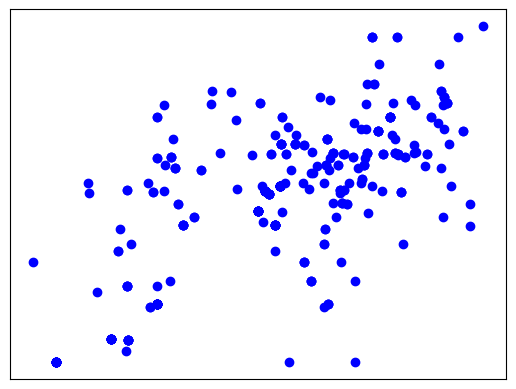

In [292]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(label_test, viability_predicted))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(label_test, viability_predicted))

# Visualisation
plt.scatter(label_test, viability_predicted, color="blue")
plt.xticks(())
plt.yticks(())
plt.show()

In [293]:
drug_response = pt_metadata.drug_response_gdsc1[pt_metadata.drug_response_gdsc1['cell_line_name'].isin(adata.obs.cell_line)]
drug_response = drug_response.pivot(index='cell_line_name', columns='drug_name', values='ln_ic50')
drug_response.head()

drug_name,(5Z)-7-Oxozeaenol,5-Fluorouracil,965-D2,993-D2,A-443654,A-770041,A-83-01,ACY-1215,AGI-6780,AICA Ribonucleotide,...,ZG-10,ZL049,ZL109,ZM447439,ZSTK474,Zibotentan,"eEF2K Inhibitor, A-484954",kb NB 142-70,rTRAIL,torin2
cell_line_name,,,,,,,,,,,,,,,,,,,,,
22RV1,2.473594,0.579534,3.072015,5.010936,NaN,NaN,5.299894,0.848553,2.072854,8.277564,...,2.216771,3.456567,0.704177,3.415833,-0.571660,5.886388,5.891054,2.989656,-0.586829,NaN
5637,1.626606,3.166983,4.410360,4.227483,NaN,NaN,3.847780,1.039981,1.127383,8.011505,...,NaN,2.053874,0.046212,0.556022,0.239659,5.144572,5.273391,2.519340,-2.889220,NaN
8505C,0.419249,2.447798,NaN,NaN,NaN,NaN,4.472385,1.684219,0.912301,7.954168,...,1.217821,3.422601,-2.121398,1.630272,1.115112,5.092384,5.443555,1.639219,-0.802009,-2.722521
A2058,NaN,5.144772,NaN,NaN,NaN,NaN,3.322242,3.517823,1.408728,7.617709,...,1.070022,2.570657,-1.714746,1.292062,1.100533,5.547936,5.373069,3.154308,-2.067882,NaN
A2780,0.485988,0.666625,2.868919,3.537939,NaN,NaN,3.167844,1.480489,0.765459,7.608179,...,1.119347,4.611726,-0.345197,3.646963,-0.909179,5.204600,5.302141,1.002677,-0.797652,NaN


In [294]:
# contains NA values, need imputation
imputer = SimpleImputer(strategy='mean')
drug_response_imputed = imputer.fit_transform(drug_response.values)
drug_response_imputed

array([[ 2.473594  ,  0.579534  ,  3.072015  , ...,  2.989656  ,
        -0.586829  , -2.62029729],
       [ 1.626606  ,  3.166983  ,  4.41036   , ...,  2.51934   ,
        -2.88922   , -2.62029729],
       [ 0.419249  ,  2.447798  ,  3.65231126, ...,  1.639219  ,
        -0.802009  , -2.722521  ],
       ...,
       [ 0.138006  ,  2.525089  ,  3.65231126, ...,  4.173171  ,
        -2.278326  , -2.493473  ],
       [ 2.100859  ,  2.097828  ,  3.65231126, ...,  6.357068  ,
        -3.193179  ,  2.188268  ],
       [ 0.428113  ,  3.185486  ,  3.930901  , ...,  2.697499  ,
         0.17049   , -2.62029729]])

In [295]:
# create an anndata for drug reponse
adata_drug_reponse = ad.AnnData(drug_response_imputed)
adata_drug_reponse.obs.index = drug_response.index
adata_drug_reponse.var.index = drug_response.columns
adata_drug_reponse

AnnData object with n_obs × n_vars = 27 × 378

In [296]:
sc.tl.pca(adata_drug_reponse)
sc.pp.neighbors(adata_drug_reponse)
sc.tl.umap(adata_drug_reponse)

In [297]:
sc.tl.leiden(adata_drug_reponse, resolution=2, key_added="leiden")

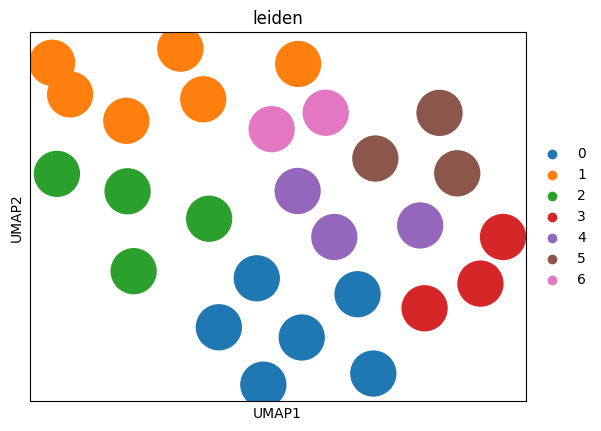

In [298]:
sc.pl.umap(adata_drug_reponse, color="leiden")
# emmm interesting..

In [299]:
adata.obs = adata.obs.merge(adata_drug_reponse.obs[['leiden']], how = "left", 
                            left_on = "cell_line_name", right_index = True)
adata.obs

,DepMap_ID,cancer,cell_det_rate,cell_line,cell_quality,channel,disease,dose_unit,dose_value,doublet_CL1,...,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues,drug_name,ln_ic50,leiden
ATTTCACTCAATCCAG,ACH-000367,True,0.211837,NCIH226,normal,A,lung cancer,µM,0.1,NCIH226_LUNG,...,NaN,NaN,PT-hfcpvz,NaN,Pleural epithelioid mesothelioma,C45662,Indicated to have a TP53 p.Arg158Leu (c.473G>T...,Trametinib,0.090283,NaN
CATAAGCAGACTCAAA,ACH-000098,True,0.131299,GAMG,normal,2,brain cancer,µM,0.5,GAMG_CENTRAL_NERVOUS_SYSTEM,...,NaN,NaN,PT-HmIANs,NaN,Glioblastoma,C3058,NaN,Afatinib,3.458473,0
TGGGCTGGTTCAGCTA,ACH-000776,True,0.127041,ONS76,normal,2,brain cancer,µM,0.5,ONS76_CENTRAL_NERVOUS_SYSTEM,...,NaN,NaN,PT-DtdDWT,NaN,Medulloblastoma,C3222,NaN,Afatinib,1.921013,NaN
CCAATTTGTAGTGGCA,ACH-000415,True,0.175474,BICR6,normal,2.0,head and neck cancer,µM,10.0,BICR6_UPPER_AERODIGESTIVE_TRACT,...,NaN,NaN,PT-Typnjw,NaN,Hypopharyngeal squamous cell carcinoma,C4043,NaN,NaN,NaN,NaN
CTCGTCACAATCGAAA-1,ACH-000510,True,0.137702,NCIH1299,normal,nan,lung cancer,nan,NaN,NCIH1299_LUNG,...,NaN,NaN,PT-7qWq2K,NaN,Lung large cell carcinoma,C4450,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCACTATTCAGGAAGC,ACH-000367,True,0.143032,NCIH226,normal,1,lung cancer,µM,0.0,NCIH226_LUNG,...,NaN,NaN,PT-hfcpvz,NaN,Pleural epithelioid mesothelioma,C45662,Indicated to have a TP53 p.Arg158Leu (c.473G>T...,NaN,NaN,NaN
CGATTGAGTCGTCTTC,ACH-000159,True,0.132034,OSRC2,normal,nan,kidney cancer,µM,0.1,OSRC2_KIDNEY,...,NaN,NaN,PT-T2g8EU,NaN,Clear cell renal cell carcinoma,C4033,NaN,Dabrafenib,4.736551,NaN
CGTTGGGGTGGTCCGT-1,ACH-000717,True,0.126214,COLO680N,normal,nan,esophageal cancer,µM,0.1,COLO680N_OESOPHAGUS,...,NaN,NaN,PT-es34jp,NaN,Esophageal squamous cell carcinoma,C4024,NaN,Trametinib,0.223879,NaN
GTGCGGTCATTTCACT-1,ACH-000956,True,0.093986,22RV1,normal,nan,prostate cancer,µM,0.1,22RV1_PROSTATE,...,NaN,NaN,PT-rqTCjv,NaN,Prostate carcinoma,C4863,NaN,NaN,NaN,NaN


In [300]:
adata.obs.leiden = adata.obs.leiden.astype(str)
adata.obs['leiden'] = adata.obs['leiden'].replace("nan", 'unknown')
adata.obs.leiden = "cell line cluster " + adata.obs.leiden 
adata.obs.leiden = adata.obs.leiden.astype('category')

In [301]:
ccle_exp_gene_names = [gene_name.split(' (')[0] for gene_name in adata.obsm['bulk_rna_expression_broad'].columns.values]
ccle_exp_gene_names = np.array(ccle_exp_gene_names)
overlap_genes = np.intersect1d(ccle_exp_gene_names, adata.var.index.values)
overlap_gene_indices = np.where(np.isin(ccle_exp_gene_names, overlap_genes))[0]

In [302]:
# sorted coefficients of the overlapping genes in the dataset
coeffcient = {'coefficients': lr.coef_[overlap_gene_indices], 'genes': ccle_exp_gene_names[overlap_gene_indices]}
coeffcient = pd.DataFrame(coeffcient)
coeffcient_sorted = coeffcient.reindex(coeffcient['coefficients'].abs().sort_values(ascending=False).index)
coeffcient_sorted = coeffcient_sorted.reset_index(drop=True)
coeffcient_sorted

,coefficients,genes
0,-1.305883e+13,TAC1
1,1.093679e+13,ARHGAP33
2,-7.979153e+12,TTC22
3,6.815596e+12,SPATA20
4,-6.709371e+12,HECW1
...,...,...
17841,0.000000e+00,OR11G2
17842,0.000000e+00,SUN5
17843,0.000000e+00,OR4C12
17844,0.000000e+00,OR4K14


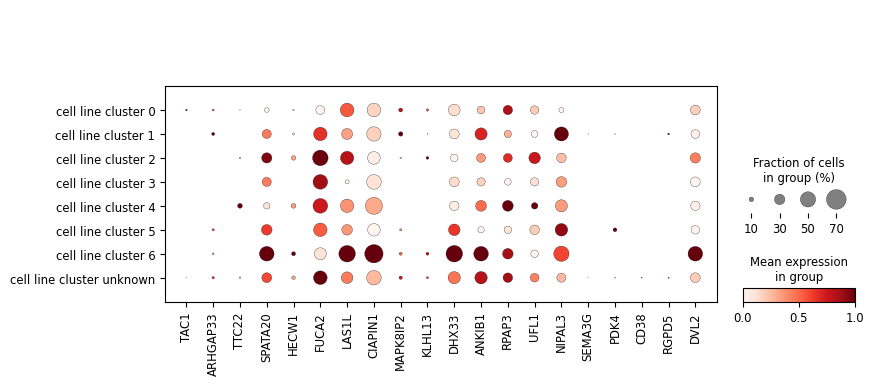

In [303]:
sc.pl.dotplot(adata, var_names = coeffcient_sorted.genes.values[0:20], groupby = 'leiden', standard_scale='var')

In [304]:
indices = range(len(not_na_viability_array))

In [305]:
data_train_new, data_test_new, label_train_new, label_test_new, indices_train, indices_test = train_test_split(not_na_bulk_array, not_na_viability_array, indices, test_size=0.3, random_state=42)

In [306]:
arc_witch = LinearRegression()
arc_witch.fit(data_train_new, label_train_new)
viability_predicted_new = arc_witch.predict(data_test_new)

In [307]:
adata_notna = adata[not_na_both]
adata_notna

View of AnnData object with n_obs × n_vars = 1127 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID', 'cell_line_name', 'stripped_cell_line_name', 'CCLE_Name', 'alias', 'COSMICID', 'source', 'RRID', 'WTSI_Master_Cell_ID', 'sample_collection_site', 'primary_or_metastasis', 'primary_disease', 'Subtype', 'age', 'Sanger_Model_ID', 'depmap_public_comments', 'lineage', 'lineage_subtype', 'lineage_sub_subtype', 'lineage_molecular_subtype', 'default_growth_pattern', 'model_manipulation', 'model_manipulation_details', 'p

In [308]:
adata_notna[indices_train].obs

,DepMap_ID,cancer,cell_det_rate,cell_line,cell_quality,channel,disease,dose_unit,dose_value,doublet_CL1,...,model_manipulation,model_manipulation_details,patient_id,parent_depmap_id,Cellosaurus_NCIt_disease,Cellosaurus_NCIt_id,Cellosaurus_issues,drug_name,ln_ic50,leiden
GAAGCAGCATCGGAAG-1,ACH-000950,True,0.140673,LOVO,normal,nan,colon/colorectal cancer,µM,0.1,LOVO_LARGE_INTESTINE,...,NaN,NaN,PT-6USEGU,NaN,Colon adenocarcinoma,C4349,NaN,Dabrafenib,1.815567,cell line cluster unknown
CACATTTAGCAGCGTA,ACH-000117,True,0.103759,EFM192A,normal,nan,breast cancer,µM,0.1,EFM192A_BREAST,...,NaN,NaN,PT-qkpbqp,NaN,Breast carcinoma,C4872,NaN,Dabrafenib,3.814962,cell line cluster unknown
ACGAGGATCATGTAGC,ACH-000657,True,0.077781,A2780,normal,nan,ovarian cancer,µM,0.1,A2780_OVARY,...,NaN,NaN,PT-ug3gCf,NaN,Ovarian endometrioid adenocarcinoma,C7979,NaN,Trametinib,-2.765944,cell line cluster 0
GACGTTAGTTCTCCCA,ACH-000552,True,0.092485,HT29,normal,5,colon/colorectal cancer,µM,2.5,HT29_LARGE_INTESTINE,...,NaN,NaN,PT-sF39aT,NaN,Colon adenocarcinoma,C4349,Indicated in PubMed=11921276 as originating fr...,JQ1,3.500255,cell line cluster unknown
TATTGGGGTTAATCGC,ACH-000672,True,0.132494,IALM,normal,B,lung cancer,µM,0.1,IALM_LUNG,...,NaN,NaN,PT-C7amr4,NaN,Lung large cell carcinoma,C4450,NaN,Trametinib,-0.065858,cell line cluster unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGCTCTCGTACAGTGG,ACH-000900,True,0.116809,NCIH23,normal,nan,lung cancer,µM,5.0,NCIH23_LUNG,...,NaN,NaN,PT-rWMXJp,NaN,Lung adenocarcinoma,C3512,NaN,Navitoclax,1.680504,cell line cluster unknown
GACAGCCTCTATGCCC,ACH-000717,True,0.065313,COLO680N,low_quality,A,esophageal cancer,µM,0.1,COLO680N_OESOPHAGUS,...,NaN,NaN,PT-es34jp,NaN,Esophageal squamous cell carcinoma,C4024,NaN,Trametinib,0.223879,cell line cluster unknown
CTTCAATTCCGACAGC,ACH-000717,True,0.163006,COLO680N,normal,A,esophageal cancer,µM,0.1,COLO680N_OESOPHAGUS,...,NaN,NaN,PT-es34jp,NaN,Esophageal squamous cell carcinoma,C4024,NaN,Trametinib,0.223879,cell line cluster unknown
GGCTGGTAGACGACGT,ACH-000717,True,0.095763,COLO680N,normal,nan,esophageal cancer,µM,0.1,COLO680N_OESOPHAGUS,...,NaN,NaN,PT-es34jp,NaN,Esophageal squamous cell carcinoma,C4024,NaN,Trametinib,0.223879,cell line cluster unknown


In [309]:
adata_notna[indices_train].obs.cell_line.value_counts()

cell_line
COLO680N    58
RCC10RGB    48
SKMEL2      42
NCIH226     30
DKMG        30
            ..
CORL23       1
MESSA        1
SW948        1
HT29         1
5637         1
Name: count, Length: 91, dtype: int64

In [310]:
adata_notna[indices_test].obs.cell_line.value_counts()

cell_line
DKMG         20
COLO680N     18
RCC10RGB     14
RCM1         14
CAL62        13
             ..
HUCCT1        1
PATU8988T     1
MESSA         1
NCIH2009      1
NCIH1793      1
Name: count, Length: 75, dtype: int64

Mean squared error: 26988695289363307692032.00
Coefficient of determination: -3242664945177707151360.00


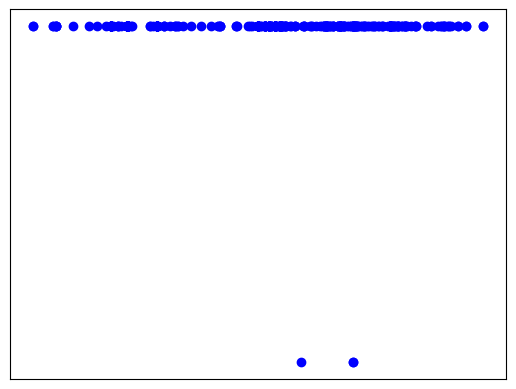

In [311]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(label_test_new, viability_predicted_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(label_test_new, viability_predicted_new))

# Visualisation
plt.scatter(label_test_new, viability_predicted_new, color="blue")
plt.xticks(())
plt.yticks(())
plt.show()

# I believe this the magic of arch witch

In [ ]:
#cell_line_drug_response = pd.DataFrame()
#cell_line_drug_response["cell_line_name"] = drug_response.index.values
#cell_line_drug_response["cell_line_cluster"] = hierarchy.cut_tree(hierach, n_clusters=3).flatten()
#cell_line_drug_response["cell_line_cluster"] = cell_line_drug_response["cell_line_cluster"].astype(str)

In [ ]:
#second plot

In [312]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [313]:
adata.obs['DepMap_ID'] = adata.obs['DepMap_ID'].astype('category')
adata_control = adata[adata.obs.perturbation == 'control']
adata_control.obs.reset_index(drop=True, inplace=True)

In [314]:
base_line_expression = pd.DataFrame(columns=adata_control.var_names, index=adata_control.obs['DepMap_ID'].cat.categories)                                                                                                 
for cl in adata_control.obs.DepMap_ID.cat.categories: 
    base_line_expression.loc[cl] = adata_control[adata_control.obs['DepMap_ID'] == cl].X.mean(0)
base_line_expression.reset_index(inplace=True)
base_line_expression = pd.melt(base_line_expression, id_vars='index', var_name='Gene', value_name='Value')
base_line_expression.columns = ['Cell line', 'Gene', 'base']
base_line_expression.head()

,Cell line,Gene,base
0,ACH-000001,MIR1302-10,0.0
1,ACH-000012,MIR1302-10,0.0
2,ACH-000015,MIR1302-10,0.0
3,ACH-000021,MIR1302-10,0.0
4,ACH-000022,MIR1302-10,0.0


In [315]:
ccle_exp_gene = pt_metadata.bulk_rna_broad
ccle_exp_gene.columns = [gene_name.split(' (')[0] for gene_name in ccle_exp_gene.columns.values]
ccle_exp_gene = ccle_exp_gene.reset_index()
ccle_exp_gene = pd.melt(ccle_exp_gene, id_vars='index', var_name='Gene', value_name='Value')
ccle_exp_gene.columns = ['Cell line', 'Gene', 'broad']
compare_cl_expr = base_line_expression.merge(ccle_exp_gene, how = "inner")
compare_cl_expr.head()

In [ ]:
# Create scatter plot
plt.scatter(compare_cl_expr.base, compare_cl_expr.broad)

# Set labels and title
plt.xlabel('Base')
plt.ylabel('Broad')
plt.title('Scatter Plot')

# Display the plot
plt.show()